In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
data = {
    'Study_Hours': [1.5, 2.3, 3.2, 4.0, 4.8, 5.5, 6.1, 7.2, 8.0, 9.5],
    'Exam_Score': [35, 40, 50, 55, 60, 65, 70, 75, 80, 90]
}

df = pd.DataFrame(data)
df.head()


,Study_Hours,Exam_Score
0,1.5,35
1,2.3,40
2,3.2,50
3,4.0,55
4,4.8,60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  10 non-null     float64
 1   Exam_Score   10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes
None
       Study_Hours  Exam_Score
count    10.000000   10.000000
mean      5.210000   62.000000
std       2.558841   17.511901
min       1.500000   35.000000
25%       3.400000   51.250000
50%       5.150000   62.500000
75%       6.925000   73.750000
max       9.500000   90.000000


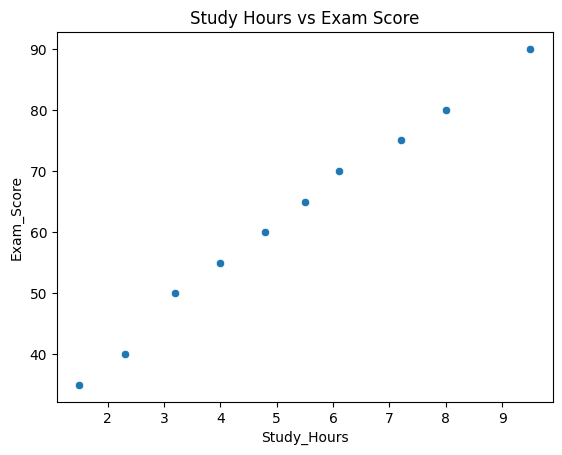

In [7]:
print(df.info())
print(df.describe())

# Visualization
sns.scatterplot(x='Study_Hours', y='Exam_Score', data=df)
plt.title('Study Hours vs Exam Score')
plt.show()


In [6]:
X = df[['Study_Hours']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
#Make prediction
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


   Actual  Predicted
8      80  81.195079
1      40  42.794376


In [9]:
#Model evalation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 1.99
Mean Squared Error: 4.62
R² Score: 0.99


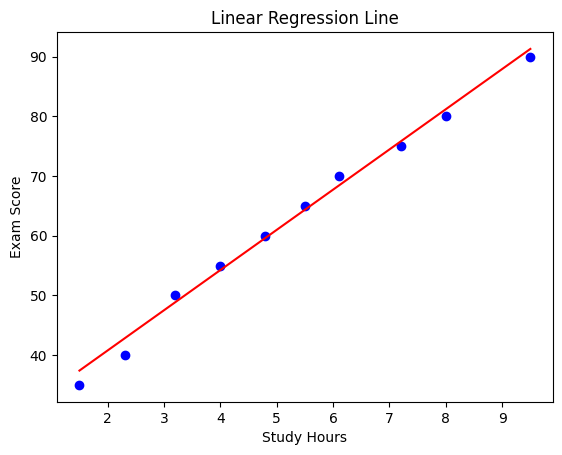

<Figure size 640x480 with 0 Axes>

In [15]:
#Visualize the Regression Line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()
plt.savefig('LRspecific_figure.pdf', format='pdf', bbox_inches='tight')



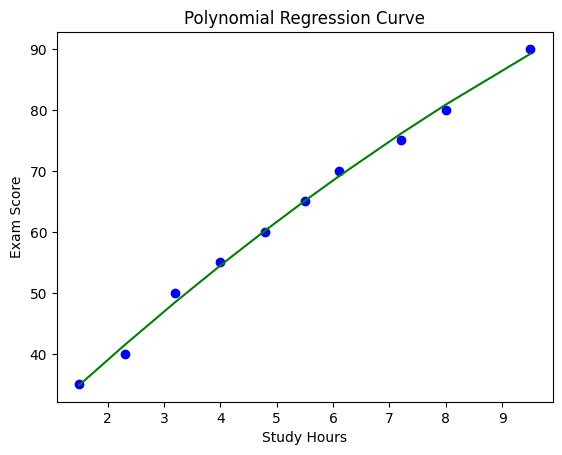

In [13]:
##Visualize the polynomial Regression Line
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_pred = poly_model.predict(X_poly)

plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='green')
plt.title('Polynomial Regression Curve')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()
